# What is NYC's favorite dog?

The data has sorted to only included dogs that were licensed and were marked as having a known breed.
About 11.7% of the licensed dogs were registered as an "unknown" breed.

In [54]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

%matplotlib inline

#### Just a little preview of the data set, the full one can be viewed on github.

In [46]:
df = pd.read_csv("most-popular-breed-2018.csv")
df.head()

,dog_id,name,gender,birth_year,breed,borough,zipcode,issue_date,expire_date
0,1,COCO,F,2016,Staffordshire Bull Terrier,Staten Island,10306,2018-01-02,2019-01-30
1,2,CHLOE,F,2005,Yorkshire Terrier,Manhattan,10128,2018-01-02,2019-01-10
2,3,MILO,M,2011,Bichon Frise,Manhattan,10031,2018-01-02,2019-02-06
3,4,TONY,M,2011,Weimaraner,Queens,11357,2018-01-02,2019-02-17
4,5,FORTE,M,2007,Havanese,Manhattan,10023,2018-01-02,2020-01-13


#### I decided to try to count the values in python and then graph it rather than exporting a 2-column csv file just to see if it was easier to do in python.
This way is actually less work so I prefer it.

### NYC's Most Popular Dog Breed of 2018
The most popular dog breed was queried using PostgreSQL and then read into matplotlib for graphing.

Please refer to '2018_yearly_analysis.sql' to see the SQL on that.

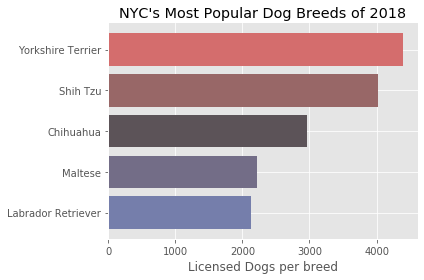

In [65]:
with open('most-popular-breed-2018.csv') as csv_file:
	csv_reader = csv.DictReader(csv_file)

	breed_counter = Counter()
	for row in csv_reader:
		breed_counter.update(row['breed'].split(';'))

breeds,popularity = map(list,zip(*breed_counter.most_common(5)))

plt.barh(breeds, popularity,color=['#d46d6d','#986767','#5c5358','#736d87','#757eab'])
plt.gca().invert_yaxis()

plt.style.use('ggplot')

plt.title("NYC's Most Popular Dog Breeds of 2018")
plt.xlabel("Licensed Dogs per breed")
plt.ylabel("")

plt.tight_layout()
plt.show()

So NYC does love their yorkies... this along with the fact that 4 out of the 5 most popular dog breeds are small makes a lot of sense because New Yorkers don't really have space for big dogs.

### Most Common Names for Both Female and Male Dogs From The Years 2014 - 2018
Very easy to query this, just run a where gender = 'F'

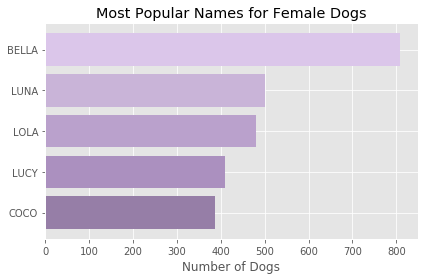

In [83]:
girl_names = pd.read_csv('f_name.csv', delimiter = ',')
g_name = girl_names.head()['name']
g_count = girl_names.head()['count']

plt.barh(g_name, g_count,color=['#dbc6ea', '#c9b4d8', '#baa1cc','#ab90bf','#967ea7'])
plt.gca().invert_yaxis()

plt.style.use('ggplot')

plt.title("Most Popular Names for Female Dogs")
plt.xlabel("Number of Dogs")
plt.ylabel("")

plt.tight_layout()
plt.show()

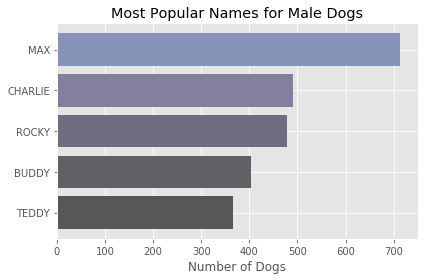

In [84]:
boy_names = pd.read_csv('m_name.csv', delimiter = ',')
b_name = boy_names.head()['name']
b_count = boy_names.head()['count']

plt.barh(b_name, b_count,color=['#8793b9', '#82809d', '#706c80','#625f65','#575757'])
plt.gca().invert_yaxis()

plt.style.use('ggplot')

plt.title("Most Popular Names for Male Dogs")
plt.xlabel("Number of Dogs")
plt.ylabel("")

plt.tight_layout()
plt.show()

### Importing the total number of registered dogs of each year from 2014 - 2018
To be honest, I could've just renamed the columns in postgre but I wanted to see if it could be done in Python, and partly because I was too lazy to rename it and export it again. :)

In [85]:
all_dogs_count = pd.read_csv('all_yr_dog_count.csv', delimiter = ',')
all_dogs_count.rename(columns = {'count_2014':'2014', 'count_2015':'2015', 'count_2016':'2016', 
                       'count_2017':'2017','count_2018':'2018'}, inplace = True)
all_dogs_count

,2014,2015,2016,2017,2018
0,2650,42439,119080,110995,70465


Here, I am reshaping the dataframe using the melt function in order to pivot the df.

In [86]:
dog_count_table = pd.melt(all_dogs_count)
dog_count_table.rename(columns = {'variable':'year', 'value':'count'}, inplace = True)
dog_count_table

,year,count
0,2014,2650
1,2015,42439
2,2016,119080
3,2017,110995
4,2018,70465


In [87]:
year = dog_count_table['year']
count = dog_count_table['count']

Text(0, 0.5, 'Number of Registered Dogs')

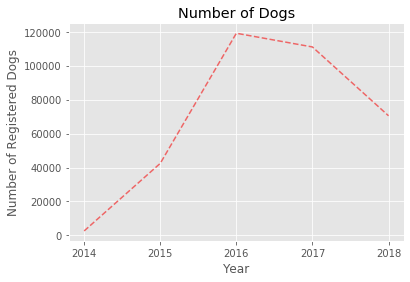

In [88]:
plt.style.use('ggplot')
plt.plot(year,count, color = '#EE6666', linestyle='--')
plt.title("Number of Dogs")
plt.xlabel("Year")
plt.ylabel("Number of Registered Dogs")

There was a large increase in the number of pet owners in 2016 and a slow decline has followed.